### Import your libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Load your dataset

In [2]:
df = pd.read_csv('HR_Missing_Values.csv')


### Explore your data 

* First 5 recods.
* Last 5 records. 
* Check data types.
* Show statistical summary.
* Is there any missing values?
* Applay two more data analysis from your choose.

In [3]:
df.head(10)

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,07/10/83,M,Single,White,7/5/2011,NaN,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,05/05/75,M,Married,White,3/30/2015,6/16/2016,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,09/19/88,F,Married,White,7/5/2011,9/24/2012,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaN,F,Married,White,1/7/2008,NaN,Production,Elijiah Gray,16.0,Indeed,15.0
4,NaN,10069,50825.0,19,Production Technician I,09/08/89,F,Divorced,White,7/11/2011,9/6/2016,Production,Webster Butler,39.0,Google Search,2.0
5,NaN,10002,57568.0,19,Production Technician I,05/22/77,F,Single,White,1/9/2012,NaN,Production,Amy Dunn,11.0,LinkedIn,15.0
6,"Andreola, Colby",10194,95660.0,24,Software Engineer,05/24/79,F,Single,White,11/10/2014,NaN,Software Engineering,Alex Sweetwater,10.0,LinkedIn,19.0
7,"Athwal, Sam",10062,59365.0,19,Production Technician I,02/18/83,M,Widowed,White,9/30/2013,NaN,Production,Ketsia Liebig,19.0,Employee Referral,19.0
8,NaN,10114,47837.0,19,Production Technician I,02/11/70,F,Single,Black or African American,7/6/2009,NaN,Production,Brannon Miller,12.0,Diversity Job Fair,4.0
9,NaN,10250,NaN,14,IT Support,01/07/88,NaN,Divorced,White,1/5/2015,NaN,IT/IS,Peter Monroe,7.0,Indeed,16.0


In [4]:
df.tail(10)

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
301,"Wilber, Barry",10048,55140.0,19,Production Technician I,09/09/65,M,Married,White,5/16/2011,9/7/2015,Production,Amy Dunn,11.0,Website,7.0
302,"Wilkes, Annie",10204,58062.0,19,Production Technician I,07/30/83,F,Divorced,White,1/10/2011,5/14/2012,Production,Ketsia Liebig,19.0,Google Search,9.0
303,"Williams, Jacquelyn",10264,59728.0,19,Production Technician I,10/02/69,NaN,Single,Black or African American,1/9/2012,6/27/2015,Production,Ketsia Liebig,19.0,Diversity Job Fair,16.0
304,"Winthrop, Jordan",10033,70507.0,20,Production Technician II,11/07/58,M,Single,White,1/7/2013,2/21/2016,Production,Brannon Miller,12.0,LinkedIn,7.0
305,"Wolk, Hang T",10174,60446.0,20,Production Technician II,NaN,F,Single,White,9/29/2014,NaN,Production,David Stanley,14.0,LinkedIn,NaN
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,05/11/85,M,Single,White,7/7/2014,NaN,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaN,F,Single,Asian,9/2/2008,9/29/2015,Production,Brannon Miller,12.0,Google Search,4.0
308,NaN,10010,220450.0,6,CIO,NaN,F,Single,White,4/10/2010,NaN,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,02/24/79,F,Single,White,3/30/2015,NaN,IT/IS,Simon Roup,4.0,Employee Referral,NaN
310,NaN,10271,45046.0,19,Production Technician I,08/17/78,F,Widowed,Asian,9/29/2014,NaN,Production,David Stanley,14.0,LinkedIn,2.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Employee_Name      218 non-null    object 
 1   EmpID              311 non-null    int64  
 2   Salary             249 non-null    float64
 3   PositionID         311 non-null    int64  
 4   Position           311 non-null    object 
 5   DOB                280 non-null    object 
 6   Sex                249 non-null    object 
 7   MaritalDesc        311 non-null    object 
 8   RaceDesc           311 non-null    object 
 9   DateofHire         311 non-null    object 
 10  DateofTermination  104 non-null    object 
 11  Department         311 non-null    object 
 12  ManagerName        311 non-null    object 
 13  ManagerID          303 non-null    float64
 14  RecruitmentSource  311 non-null    object 
 15  Absences           280 non-null    float64
dtypes: float64(3), int64(2), o

In [6]:
df.describe()

,EmpID,Salary,PositionID,ManagerID,Absences
count,311.000000,249.000000,311.000000,303.000000,280.000000
mean,10156.000000,67972.662651,16.845659,14.570957,10.128571
std,89.922189,22995.908395,6.223419,8.078306,5.946407
min,10001.000000,45046.000000,1.000000,1.000000,1.000000
25%,10078.500000,55315.000000,18.000000,10.000000,4.750000
50%,10156.000000,62957.000000,19.000000,15.000000,10.000000
75%,10233.500000,71707.000000,20.000000,19.000000,15.250000
max,10311.000000,220450.000000,30.000000,39.000000,20.000000


In [7]:
df.isnull().sum()

Employee_Name         93
EmpID                  0
Salary                62
PositionID             0
Position               0
DOB                   31
Sex                   62
MaritalDesc            0
RaceDesc               0
DateofHire             0
DateofTermination    207
Department             0
ManagerName            0
ManagerID              8
RecruitmentSource      0
Absences              31
dtype: int64

In [8]:
df['Department'].value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

In [9]:
df['Position'].value_counts()

Production Technician I         137
Production Technician II         57
Area Sales Manager               27
Production Manager               14
Software Engineer                10
IT Support                        8
Data Analyst                      7
Sr. Network Engineer              5
Database Administrator            5
Network Engineer                  5
BI Developer                      4
Senior BI Developer               3
Administrative Assistant          3
Sales Manager                     3
Accountant I                      3
Sr. DBA                           2
IT Manager - DB                   2
Sr. Accountant                    2
Director of Operations            1
Shared Services Manager           1
Data Analyst                      1
Data Architect                    1
Principal Data Architect          1
IT Manager - Infra                1
President & CEO                   1
Enterprise Architect              1
BI Director                       1
Director of Sales           

In [10]:
#change from count to average
hist1 = px.histogram(df, x='Department', y='Salary',title='Average Salary for each department', histfunc='avg')
hist1.show()

In [11]:
hist = px.histogram(df, x='Department', color='Position', title='Department vs Position')
hist.show()

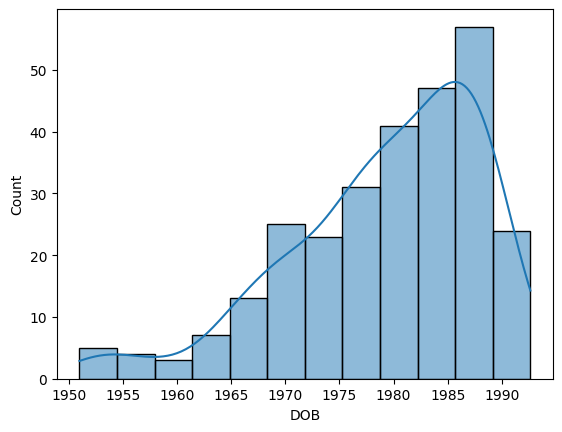

In [12]:
# problem with processing the DOB column
# it transfored the dates before 70 to 2070 not 1970

#df.drop(df[df['DOB'].isnull()].index, axis=0, inplace=True)
df['DOB'] = pd.to_datetime(df['DOB'], format='%m/%d/%y')
mask = df['DOB'].dt.year >= 2023
df.loc[mask, 'DOB'] = df.loc[mask, 'DOB'] - pd.DateOffset(years=100)
sns.histplot(df['DOB'], kde=True)
plt.show()

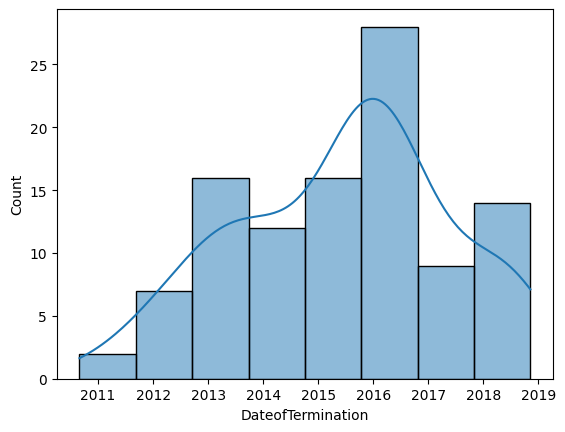

In [13]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%Y')
sns.histplot(df['DateofTermination'], kde=True)
plt.show()

In [14]:
#sns.boxplot(data=df,x=df.Salary,y=df.Department, orient='h');
box = px.box(df, x='Department', y='Salary', title='Salary distribution for each department')
box.show()
print('The median salary is: ', f'{df.Salary.median():.2f}')
print('The average salary is: ', f'{df.Salary.mean():.2f}')

The median salary is:  62957.00
The average salary is:  67972.66


### Do the following steps for each column with missing values.
* Identity the column.
* How much precentage the missing value represents?
* What is the best way to handle these missing values and why?
* Apply your method to the column.

### Columns that have missing values
- Employee_Name
- Salary
- DOB
- Sex
- DateofTermination
- Absences
- ManagerID

In [15]:
total_values = len(df)
print(f'The missing values in Employee_Name is {(df.Employee_Name.isnull().sum() /total_values) * 100:.2f}% of the total values')
print(f'The missing values in Salary is {(df.Salary.isnull().sum() / total_values) * 100:.2f}% of the total values')
print(f'The missing values in DOB is {(df.DOB.isnull().sum() / total_values) * 100:.2f}% of the total values')
print(f'The missing values in Sex is {(df.Sex.isnull().sum() / total_values) * 100:.2f}% of the total values')
print(f'The missing values in DateofTermination is {(df.DateofTermination.isnull().sum() / total_values) * 100:.2f}% of the total values')
print(f'The missing values in Absences is {(df.Absences.isnull().sum() / total_values) * 100:.2f}% of the total values')
print(f'The missing values in ManagerID is {(df.ManagerID.isnull().sum() / total_values) * 100:.2f}% of the total values')

The missing values in Employee_Name is 29.90% of the total values
The missing values in Salary is 19.94% of the total values
The missing values in DOB is 9.97% of the total values
The missing values in Sex is 19.94% of the total values
The missing values in DateofTermination is 66.56% of the total values
The missing values in Absences is 9.97% of the total values
The missing values in ManagerID is 2.57% of the total values


#### Employee Name
The column could be handeled with **deletion** if our goal is to use the data in a model. Else we can fill it with **"Unknown"** or fill it with the **Employee ID** since it has no missing values.

In [16]:
df.loc[df['Employee_Name'].isnull(), 'Employee_Name'] = 'Unknown Name'

#or

#df.loc[df['Employee_Name'].isnull(), 'Employee_Name'] = (df['EmpID'].astype(str) + '-ID (Missing Name)')
df

,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
0,"Adinolfi, Wilson K",10026,62506.0,19,Production Technician I,1983-07-10,M,Single,White,7/5/2011,NaT,Production,Michael Albert,22.0,LinkedIn,1.0
1,"Ait Sidi, Karthikeyan",10084,104437.0,27,Sr. DBA,1975-05-05,M,Married,White,3/30/2015,2016-06-16,IT/IS,Simon Roup,4.0,Indeed,17.0
2,"Akinkuolie, Sarah",10196,64955.0,20,Production Technician II,1988-09-19,F,Married,White,7/5/2011,2012-09-24,Production,Kissy Sullivan,20.0,LinkedIn,3.0
3,"Alagbe,Trina",10088,64991.0,19,Production Technician I,NaT,F,Married,White,1/7/2008,NaT,Production,Elijiah Gray,16.0,Indeed,15.0
4,Unknown Name,10069,50825.0,19,Production Technician I,1989-09-08,F,Divorced,White,7/11/2011,2016-09-06,Production,Webster Butler,39.0,Google Search,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,65893.0,20,Production Technician II,1985-05-11,M,Single,White,7/7/2014,NaT,Production,Kissy Sullivan,20.0,LinkedIn,13.0
307,"Ybarra, Catherine",10301,48513.0,19,Production Technician I,NaT,F,Single,Asian,9/2/2008,2015-09-29,Production,Brannon Miller,12.0,Google Search,4.0
308,Unknown Name,10010,220450.0,6,CIO,NaT,F,Single,White,4/10/2010,NaT,IT/IS,Janet King,2.0,Employee Referral,16.0
309,"Zhou, Julia",10043,89292.0,9,Data Analyst,1979-02-24,F,Single,White,3/30/2015,NaT,IT/IS,Simon Roup,4.0,Employee Referral,NaN


#### Salary
It can be filled with the average or median of the salary of each **department** or **position**.

In [17]:
df.Department.unique()

array(['Production       ', 'IT/IS', 'Software Engineering',
       'Admin Offices', 'Sales', 'Executive Office'], dtype=object)

In [18]:
'''
Most of the departments contain outliers as seen in the boxplot above,
so we will use the median to fill the missing values.
Executive Office has only one value and it's missing the salary,
but it's a CEO :) so, we will replace it with the maximum salary in the dataset.
'''
dept_IT_mask = (df['Department'] == 'IT/IS') & (df['Salary'].isnull())
dept_Pro_mask = (df['Department'] == 'Production       ') & (df['Salary'].isnull())
dept_SE_mask = (df['Department'] == 'Software Engineering') & (df['Salary'].isnull())
dept_AO_mask = (df['Department'] == 'Admin Offices') & (df['Salary'].isnull())
dept_Sales_mask = (df['Department'] == 'Sales') & (df['Salary'].isnull())
dept_EO_mask = (df['Department'] == 'Executive Office') & (df['Salary'].isnull())

df.loc[dept_IT_mask, 'Salary'] = df.loc[df['Department'] == 'IT/IS','Salary'].median()
df.loc[dept_Sales_mask, 'Salary'] = df.loc[df['Department'] == 'Sales','Salary'].median()
df.loc[dept_Pro_mask, 'Salary'] = df.loc[df['Department'] == 'Production       ','Salary'].median()
df.loc[dept_SE_mask, 'Salary'] = df.loc[df['Department'] == 'Software Engineering','Salary'].median()
df.loc[dept_AO_mask, 'Salary'] = df.loc[df['Department'] == 'Admin Offices','Salary'].median()
df.loc[dept_EO_mask, 'Salary'] = df['Salary'].max()

#### DOB
Replace it with the median of each department

In [19]:
dept_IT_mask = (df['Department'] == 'IT/IS') & (df['DOB'].isnull())
dept_Pro_mask = (df['Department'] == 'Production       ') & (df['DOB'].isnull())
dept_AO_mask = (df['Department'] == 'Admin Offices') & (df['DOB'].isnull())
dept_Sales_mask = (df['Department'] == 'Sales') & (df['DOB'].isnull())

df.loc[dept_IT_mask, 'DOB'] = df.loc[df['Department'] == 'IT/IS','DOB'].median()
df.loc[dept_Sales_mask, 'DOB'] = df.loc[df['Department'] == 'Sales','DOB'].median()
df.loc[dept_Pro_mask, 'DOB'] = df.loc[df['Department'] == 'Production       ','DOB'].median()
df.loc[dept_AO_mask, 'DOB'] = df.loc[df['Department'] == 'Admin Offices','DOB'].median()


#### Sex
We can replace it with the mode of the list or mode of each department or look in the name column if it is a male or female name

In [20]:
dept_name_mask = (df['Employee_Name'] != 'Unknown Name') & (df['Sex'].isnull())
#so we can fill them manually using a dictionary maybe or we can use the mode
genders = {'index': df.loc[dept_name_mask].index.tolist(), 'name': df.loc[dept_name_mask]['Employee_Name'].tolist()}
genders = pd.DataFrame(genders)

In [21]:
'''
Other solution is to use the names dataset from nltk library
'''
import nltk
# import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download('names')
from nltk.corpus import names

male_names = set(names.words('male.txt'))
female_names = set(names.words('female.txt'))

def detect_gender(name):
    #name = name.lower()
    name = name.split(',')[1].strip()
    if male_names.intersection([name]):
        return 'M'
    elif female_names.intersection([name]):
        return 'F'
    else:
        return df['Sex'].mode()[0]
    
for i, r in df[dept_name_mask].iterrows():
    df.loc[i,'Sex'] = detect_gender(r['Employee_Name'])
df.loc[dept_name_mask]

M


,Employee_Name,EmpID,Salary,PositionID,Position,DOB,Sex,MaritalDesc,RaceDesc,DateofHire,DateofTermination,Department,ManagerName,ManagerID,RecruitmentSource,Absences
15,"Bates, Norman",10061,57834.0,19,Production Technician I,1981-10-18 00:00:00,M,Single,White,2/21/2011,2017-08-04,Production,Kelley Spirea,18.0,Google Search,20.0
16,"Beak, Kimberly",10023,70131.0,20,Production Technician II,1966-04-17 00:00:00,F,Married,White,7/21/2016,NaT,Production,Kelley Spirea,18.0,Employee Referral,16.0
27,"Bozzi, Charles",10175,74312.0,18,Production Manager,1970-03-10 00:00:00,M,Single,Asian,9/30/2013,2014-08-07,Production,Janet King,2.0,Indeed,14.0
39,"Carr, Claudia N",10082,92710.5,27,Sr. DBA,1986-06-06 00:00:00,F,Single,Black or African American,6/30/2016,NaT,IT/IS,Simon Roup,4.0,LinkedIn,7.0
42,"Champaigne, Brian",10108,110929.0,5,BI Director,1983-09-04 00:00:00,M,Married,White,9/6/2016,NaT,IT/IS,Jennifer Zamora,5.0,Indeed,8.0
44,"Chang, Donovan E",10154,59144.0,19,Production Technician I,1983-08-24 00:00:00,F,Single,White,7/8/2013,NaT,Production,Webster Butler,NaN,LinkedIn,4.0
51,"Clukey, Elijian",10029,50373.0,19,Production Technician I,1980-08-26 00:00:00,F,Married,White,7/6/2016,NaT,Production,Brannon Miller,12.0,Employee Referral,5.0
56,"Cornett, Lisa",10094,63381.0,19,Production Technician I,1977-03-31 00:00:00,F,Married,White,1/5/2015,NaT,Production,Kelley Spirea,18.0,Indeed,6.0
67,"Delarge, Alex",10306,61568.0,3,Area Sales Manager,1975-11-02 00:00:00,M,Single,Two or more races,9/29/2014,NaT,Sales,John Smith,17.0,Indeed,5.0
73,"DiNocco, Lily",10284,61584.0,19,Production Technician I,1978-12-02 00:00:00,F,Married,Black or African American,1/7/2013,NaT,Production,Brannon Miller,12.0,Indeed,6.0


In [22]:
#rest will be filled with the mode
df['Sex'] = df['Sex'].fillna(df['Sex'].mode()[0])

#### Date of Termination
can be replaced with the average of the column

In [23]:
#replace with the average of the column
df['DateofTermination'] = df['DateofTermination'].fillna(df['DateofTermination'].median())

#### Absences
can be replaced with the average or median

In [24]:
#replace with the median of the column
df['Absences'] = df['Absences'].fillna(df['Absences'].median())

In [25]:
df.describe()

,EmpID,Salary,PositionID,ManagerID,Absences
count,311.000000,311.000000,311.000000,303.000000,311.000000
mean,10156.000000,68456.757235,16.845659,14.570957,10.115756
std,89.922189,23208.656750,6.223419,8.078306,5.641389
min,10001.000000,45046.000000,1.000000,1.000000,1.000000
25%,10078.500000,57781.500000,18.000000,10.000000,5.000000
50%,10156.000000,61844.000000,19.000000,15.000000,10.000000
75%,10233.500000,71741.500000,20.000000,19.000000,15.000000
max,10311.000000,220450.000000,30.000000,39.000000,20.000000


In [26]:
# All the missing values are from one mangager: Webster Butler
# his ID is 39
df['ManagerID'] = df['ManagerID'].fillna(39)

In [27]:
df.isna().sum()

Employee_Name        0
EmpID                0
Salary               0
PositionID           0
Position             0
DOB                  0
Sex                  0
MaritalDesc          0
RaceDesc             0
DateofHire           0
DateofTermination    0
Department           0
ManagerName          0
ManagerID            0
RecruitmentSource    0
Absences             0
dtype: int64